In [1]:
import pandas as pd
import folium

In [2]:
df = pd.read_csv("data/좌표변환.csv")
df.head()

연번   서ㆍ센터ID      서ㆍ센터명     유형구분명  상위서ㆍ센터ID  일련번호         위도          경도  \
0   1  1116000      관악소방서       소방서   1100000    43  37.473943  126.952355   
1   2  1114103  영동119안전센터  안전센터/구조대   1114000    44  37.522143  127.036944   
2   3  1116401  관악119안전센터  안전센터/구조대   1116000    45  37.474015  126.952348   
3   4  1119106  시흥119안전센터  안전센터/구조대   1119000    46  37.448587  126.900512   
4   5  1115102  방배119안전센터  안전센터/구조대   1115000    47  37.475518  126.988210   

             X좌표            Y좌표  
0  195785.501520  541613.179889  
1  203265.811458  546962.399786  
2  195784.878412  541621.210326  
3  191196.721148  538802.571413  
4  198957.096000  541787.001000

In [3]:
# 데이터 프레임의 '위도', '경도' 평균값을 계산 -> 지도의 중심점 정하기
map_center = [df['위도'].mean(), df['경도'].mean()]

# Folium 지도 생성
# 초기 위치는 map_center
# zoom_start = 지도 초기 확대 레벨
m = folium.Map(location=map_center, zoom_start=11)

# 반복문 생성
for idx, row in df.iterrows():
  # 각 위치에 대해 Folium 마커 생성
  # popup = 마커를 클릭했을 때 보여줄 텍스트
  folium.Marker([row['위도'], row['경도']], popup=row['서ㆍ센터명']).add_to(m)

# 지도 표시
m

In [4]:
import folium
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt

# 데이터 로드
gdf = gpd.read_file("data/nlsp_030001001.shp")

In [5]:
gdf

gid      lbl     val  \
0     ë¤ì¬60b48a   400.00   400.0   
1     ë¤ì¬58b48a  3397.00  3397.0   
2     ë¤ì¬44b44b   278.00   278.0   
3     ë¤ì¬47a39a  5350.00  5350.0   
4     ë¤ì¬53b54a    65.00    65.0   
...            ...      ...     ...   
2629  ë¤ì¬66a57a     None     NaN   
2630  ë¤ì¬49b38b     None     NaN   
2631  ë¤ì¬58b41a     None     NaN   
2632  ë¤ì¬50b37b     None     NaN   
2633  ë¤ì¬72a50a     None     NaN   

                                               geometry  
0     POLYGON ((960500.000 1948000.000, 960500.000 1...  
1     POLYGON ((958500.000 1948000.000, 958500.000 1...  
2     POLYGON ((944500.000 1944500.000, 944500.000 1...  
3     POLYGON ((947000.000 1939000.000, 947000.000 1...  
4     POLYGON ((953500.000 1954000.000, 953500.000 1...  
...                                                 ...  
2629  POLYGON ((966000.000 1957000.000, 966000.000 1...  
2630  POLYGON ((949500.000 1938500.000, 949500.000 1...  
2631  POLYGON ((958500.000 1941000.000, 958500.000 1...  
2632  POLYGON ((950500.000 1937500.000, 950500.000 1...  
2633  POLYGON ((972000.000 1950000.000, 972000.000 1...  

[2634 rows x 4 columns]

In [6]:
print(gdf.info())

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 2634 entries, 0 to 2633
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   gid       2634 non-null   object  
 1   lbl       2026 non-null   object  
 2   val       2026 non-null   float64 
 3   geometry  2634 non-null   geometry
dtypes: float64(1), geometry(1), object(2)
memory usage: 82.4+ KB
None


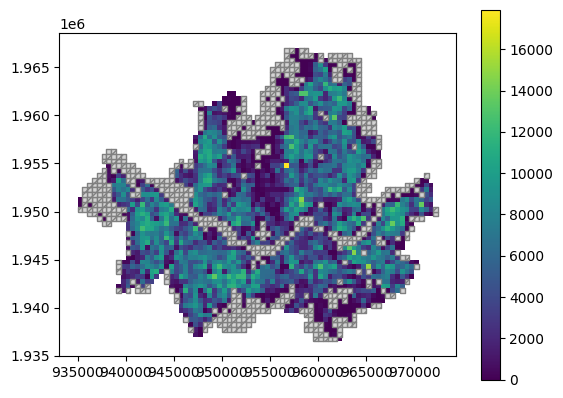

In [7]:
# 데이터 시각화
gdf.plot(column='val', cmap='viridis', legend=True, missing_kwds={
    "color": "lightgrey",
    "edgecolor": "grey",
    "hatch": "///",
    "label": "Missing values",
})

plt.show()

In [8]:
import itertools
import folium
from pyproj import Transformer
from shapely.geometry import Point, Polygon
import pandas as pd

# Transformer 객체 초기화
transformer_5178_4326 = Transformer.from_crs("epsg:5178", "epsg:4326", always_xy=True)

# 기준점 및 파라미터 설정
p_4326 = (126.7835993001915, 37.426168024755576)
meters = 500
n = 72

# 변환된 기준점 좌표 계산
p_x_5178, p_y_5178 = transformer_5178_4326.transform(p_4326[0], p_4326[1], direction='INVERSE')

# 격자 생성 및 GeoJSON 준비
geo_jsons = {"type": "FeatureCollection", "features": []}

for x, y in itertools.product(range(n), range(n)):
    grid_lower_l = transformer_5178_4326.transform(p_x_5178 + x * meters, p_y_5178 + y * meters)
    grid_lower_r = transformer_5178_4326.transform(p_x_5178 + (x + 1) * meters, p_y_5178 + y * meters)
    grid_upper_r = transformer_5178_4326.transform(p_x_5178 + (x + 1) * meters, p_y_5178 + (y + 1) * meters)
    grid_upper_l = transformer_5178_4326.transform(p_x_5178 + x * meters, p_y_5178 + (y + 1) * meters)
    
    geo_json = {
        "type": "Feature",
        "properties": {"code": f"{x}/{y}"},
        "geometry": {
            "type": "Polygon",
            "coordinates": [[
                [grid_lower_l[0], grid_lower_l[1]],
                [grid_lower_r[0], grid_lower_r[1]],
                [grid_upper_r[0], grid_upper_r[1]],
                [grid_upper_l[0], grid_upper_l[1]],
                [grid_lower_l[0], grid_lower_l[1]]
            ]]
        }
    }
    
    geo_jsons["features"].append(geo_json)

# Folium 지도 객체 생성
m = folium.Map(location=[p_4326[1], p_4326[0]], zoom_start=11)

# GeoJSON 레이어 추가
folium.GeoJson(
    geo_jsons,
    name="grid",
    style_function=lambda feature: {
        'fillColor': '#ffff00',
        'color': 'black',
        'weight': 1,
        'fillOpacity': 0.3
    }
).add_to(m)

# 지도 저장
m

In [11]:
import folium
import geopandas as gpd
import branca.colormap as cm

# 예시 데이터 로드 (여기서는 gdf를 이미 로드했다고 가정합니다)
# gdf = geopandas.read_file('path_to_your_file.shp')

# 인구수에 따른 색상 맵 생성
colormap = cm.linear.YlOrRd_09.scale(gdf['val'].min(), gdf['val'].max())

# 인구수에 따라 색상을 반환하는 함수
def style_function(feature):
    val = feature['properties']['val']
    return {
        'fillColor': colormap(val) if val is not None else 'transparent',
        'color': 'black',
        'weight': 0.5,
        'fillOpacity': 0.7
    }

# folium 지도 객체 생성 (서울 중심부를 기준으로 설정)
m_pop = folium.Map(location=[37.5665, 126.9780], zoom_start=11)

# GeoJson으로 격자 추가 및 인구수에 따른 스타일 적용
folium.GeoJson(
    gdf,
    style_function=style_function,
    tooltip=folium.GeoJsonTooltip(fields=['gid', 'val'], aliases=['GID:', '인구수:'])
).add_to(m_pop)

# 색상 맵 추가
colormap.caption = '인구수'
m_pop.add_child(colormap)

# 지도 저장
m.save('Seoul_Population_Grid.html')

# 지도 출력
m_pop
